entered case 2
entered case 3
entered case 2
entered case 3
entered case 3
entered case 2
entered case 2
entered case 2
entered case 3
entered case 3
entered case 2
entered case 1
Convergence Achieved.
γάμμα =  3.46923828125 
y(30) =  7.000463394814336e-05


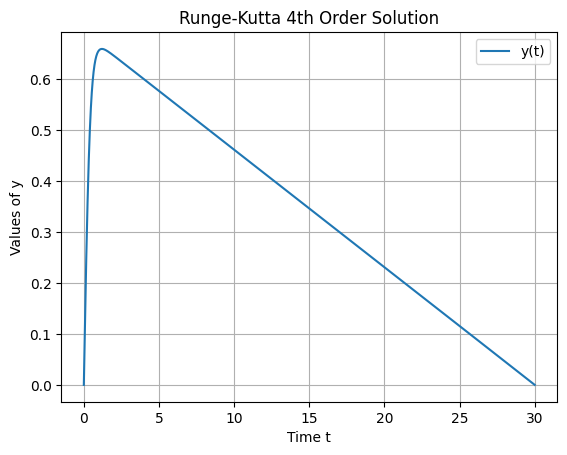

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameter Values
alpha = 0.2
beta = 0.8

# Initial Conditions
x0 = 2
y0 = 0

# Define Time Span
t0 = 0
tf = 30

# Define Step
h = 0.01

def func1(y):
    return -alpha * y

def func2(x, y, gamma):
    return beta * x - gamma * y**2

# Runge - Kutta 4th order 
def RungeKutta4thOrder(func1, func2, x0, y0, t0, tf, h, gamma):
    n = int((tf - t0) / h)
    
    t = np.linspace(t0, tf, n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    x[0] = x0
    y[0] = y0

    for i in range(n):
        k0_1 = h * func1(y[i])
        k1_1 = h * func1(y[i] + 1/2 * k0_1)
        k2_1 = h * func1(y[i] + 1/2 * k1_1)
        k3_1 = h * func1(y[i] + k2_1)
        x[i + 1] = x[i]+ 1/6 * (k0_1 + 2 * k1_1 + 2 * k2_1 + k3_1)

        k0_2 = h * func2(x[i], y[i], gamma)
        k1_2 = h * func2(x[i] + 1/2 * h, y[i] + 1/2 * k0_2, gamma)
        k2_2 = h * func2(x[i] + 1/2 * h, y[i] + 1/2 * k1_2, gamma)
        k3_2 = h * func2(x[i] + h, y[i] + k2_2, gamma)
        y[i + 1] = y[i] + 1/6 * (k0_2 + 2 * k1_2 + 2 * k2_2 + k3_2)

    return y, y[-1], t


def bisection_method():
    gamma_min = 0
    gamma_max = 10
    
    array1, ymin, t = RungeKutta4thOrder(func1, func2, x0, y0, t0, tf, h, gamma_min)
    array2, ymax, t = RungeKutta4thOrder(func1, func2, x0, y0, t0, tf, h, gamma_max)
    
    if ymin * ymax > 0:
        raise ValueError("The function must have different signs at the endpoints c_min and c_max.")
    
    for i in range(30):
        gamma_middle = (gamma_min + gamma_max) / 2
        array3, ymid, t = RungeKutta4thOrder(func1, func2, x0, y0, t0, tf, h, gamma_middle)
        
        if abs(ymid) < 0.0001:
            print("entered case 1")
            return gamma_middle
        
        if ymin * ymid < 0:
            print("entered case 2")
            gamma_max = gamma_middle
            ymax = ymid
        else:
            print("entered case 3")
            gamma_min = gamma_middle
            ymin = ymid
    
    return (gamma_min + gamma_max)/2


gamma_final = bisection_method()
array4, y_final, t_final = RungeKutta4thOrder(func1, func2, x0, y0, t0, tf, h, gamma_final)
print("Convergence Achieved.\nγάμμα = ", gamma_final, "\ny(30) = ", y_final)

# Plot the results
plt.plot(t_final, array4, label='y(t)')
plt.xlabel('Time t')
plt.ylabel('Values of y')
plt.legend()
plt.title('Runge-Kutta 4th Order Solution')
plt.grid(True)
plt.show()
